In [20]:
import os
from src.utils import data_load
import pandas as pd
from src.s3_utils import pandas_from_csv_s3
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from utils import get_survey_question, na_rate
import torch

ModuleNotFoundError: No module named 'net'

{604: 3, 186: 4, 2267: 3, 2109: 4, 173: 4, 410: 1, 95: 3, 1976: 2, 28: 4, 168: 4, 1426: 4, 2001: 3, 55: 3, 2142: 3, 1389: 3, 1714: 4, 118: 4, 2102: 2, 2066: 3, 581: 4, 38: 2, 1400: 1, 983: 2, 137: 2, 74: 1, 64: 4, 404: 2, 2151: 1, 1717: 2, 159: 4, 1708: 4, 2159: 4, 1021: 2, 1989: 4, 135: 3, 991: 2, 2015: 2, 428: 2, 193: 3, 1747: 3, 1985: 2, 969: 2, 2169: 3, 174: 2, 980: 4, 2056: 4, 66: 1, 290: 4, 1744: 3, 1373: 1, 1709: 3, 1658: 3, 2083: 3, 2174: 2, 2134: 2, 2068: 1, 2080: 3, 1716: 4, 30: 2, 1745: 1, 2061: 3, 977: 3, 2113: 3, 2041: 3, 966: 1, 2176: 2, 987: 2, 1429: 4, 1696: 4, 429: 1, 185: 3, 2126: 2, 1038: 1, 1724: 4, 2065: 3, 293: 1, 39: 1, 1427: 2, 234: 1, 53: 4, 603: 1, 1728: 2, 1988: 1, 1367: 1, 1757: 3, 2038: 2, 47: 1, 192: 3, 992: 3, 1715: 1, 2100: 1, 989: 2, 2032: 2, 407: 2, 1440: 1, 2160: 1, 190: 2, 2058: 1, 1750: 1, 1436: 1, 1393: 1, 1000: 1, 1431: 1, 289: 1}


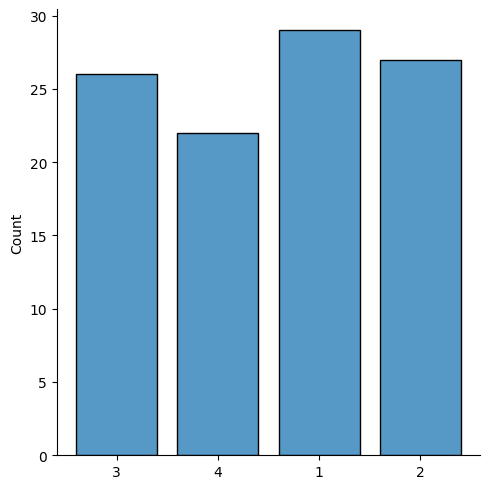

In [15]:
user_dict = {}
for f in os.listdir(os.path.join("/", "mnt", 'results', "edema_pred_window")):

    f_name_lst = f.split('_')
    if 'date' in f_name_lst:
        continue
    
    user_id = int(f_name_lst[1])
    if user_id in user_dict:
        user_dict[user_id] += 1
    else:
        user_dict[user_id] = 1
print(user_dict)
s = []
for i in user_dict:
    s.append(str(user_dict[i]))

sns.displot(s, shrink=.8, bins=['1', '2', '3', '4'])

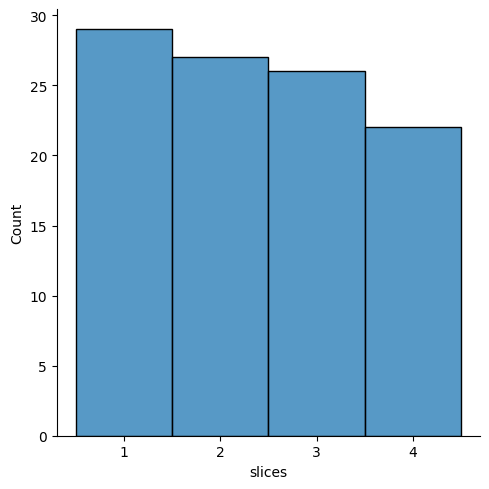

In [18]:
df = pd.DataFrame()
df['slices'] = pd.Categorical(values=s, categories=['1', '2', '3', '4']) ## Set the order for the column as you want
df.sort_values(['slices'], inplace=True) ## Sort the column
sns.displot(data = df, x = 'slices')  ## and plot

In [19]:
len(s)

104